In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv("J1newdata.csv")
df.head()


,MONTH,AVERAGE
0,1,107.62
1,2,108.32
2,3,108.83
3,4,109.09
4,5,108.62


In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.AVERAGE.dropna())
print('ADF Statistic: %f'% result[0])
print('p-value: %f'% result[1])


ADF Statistic: -2.265501
p-value: 0.183336


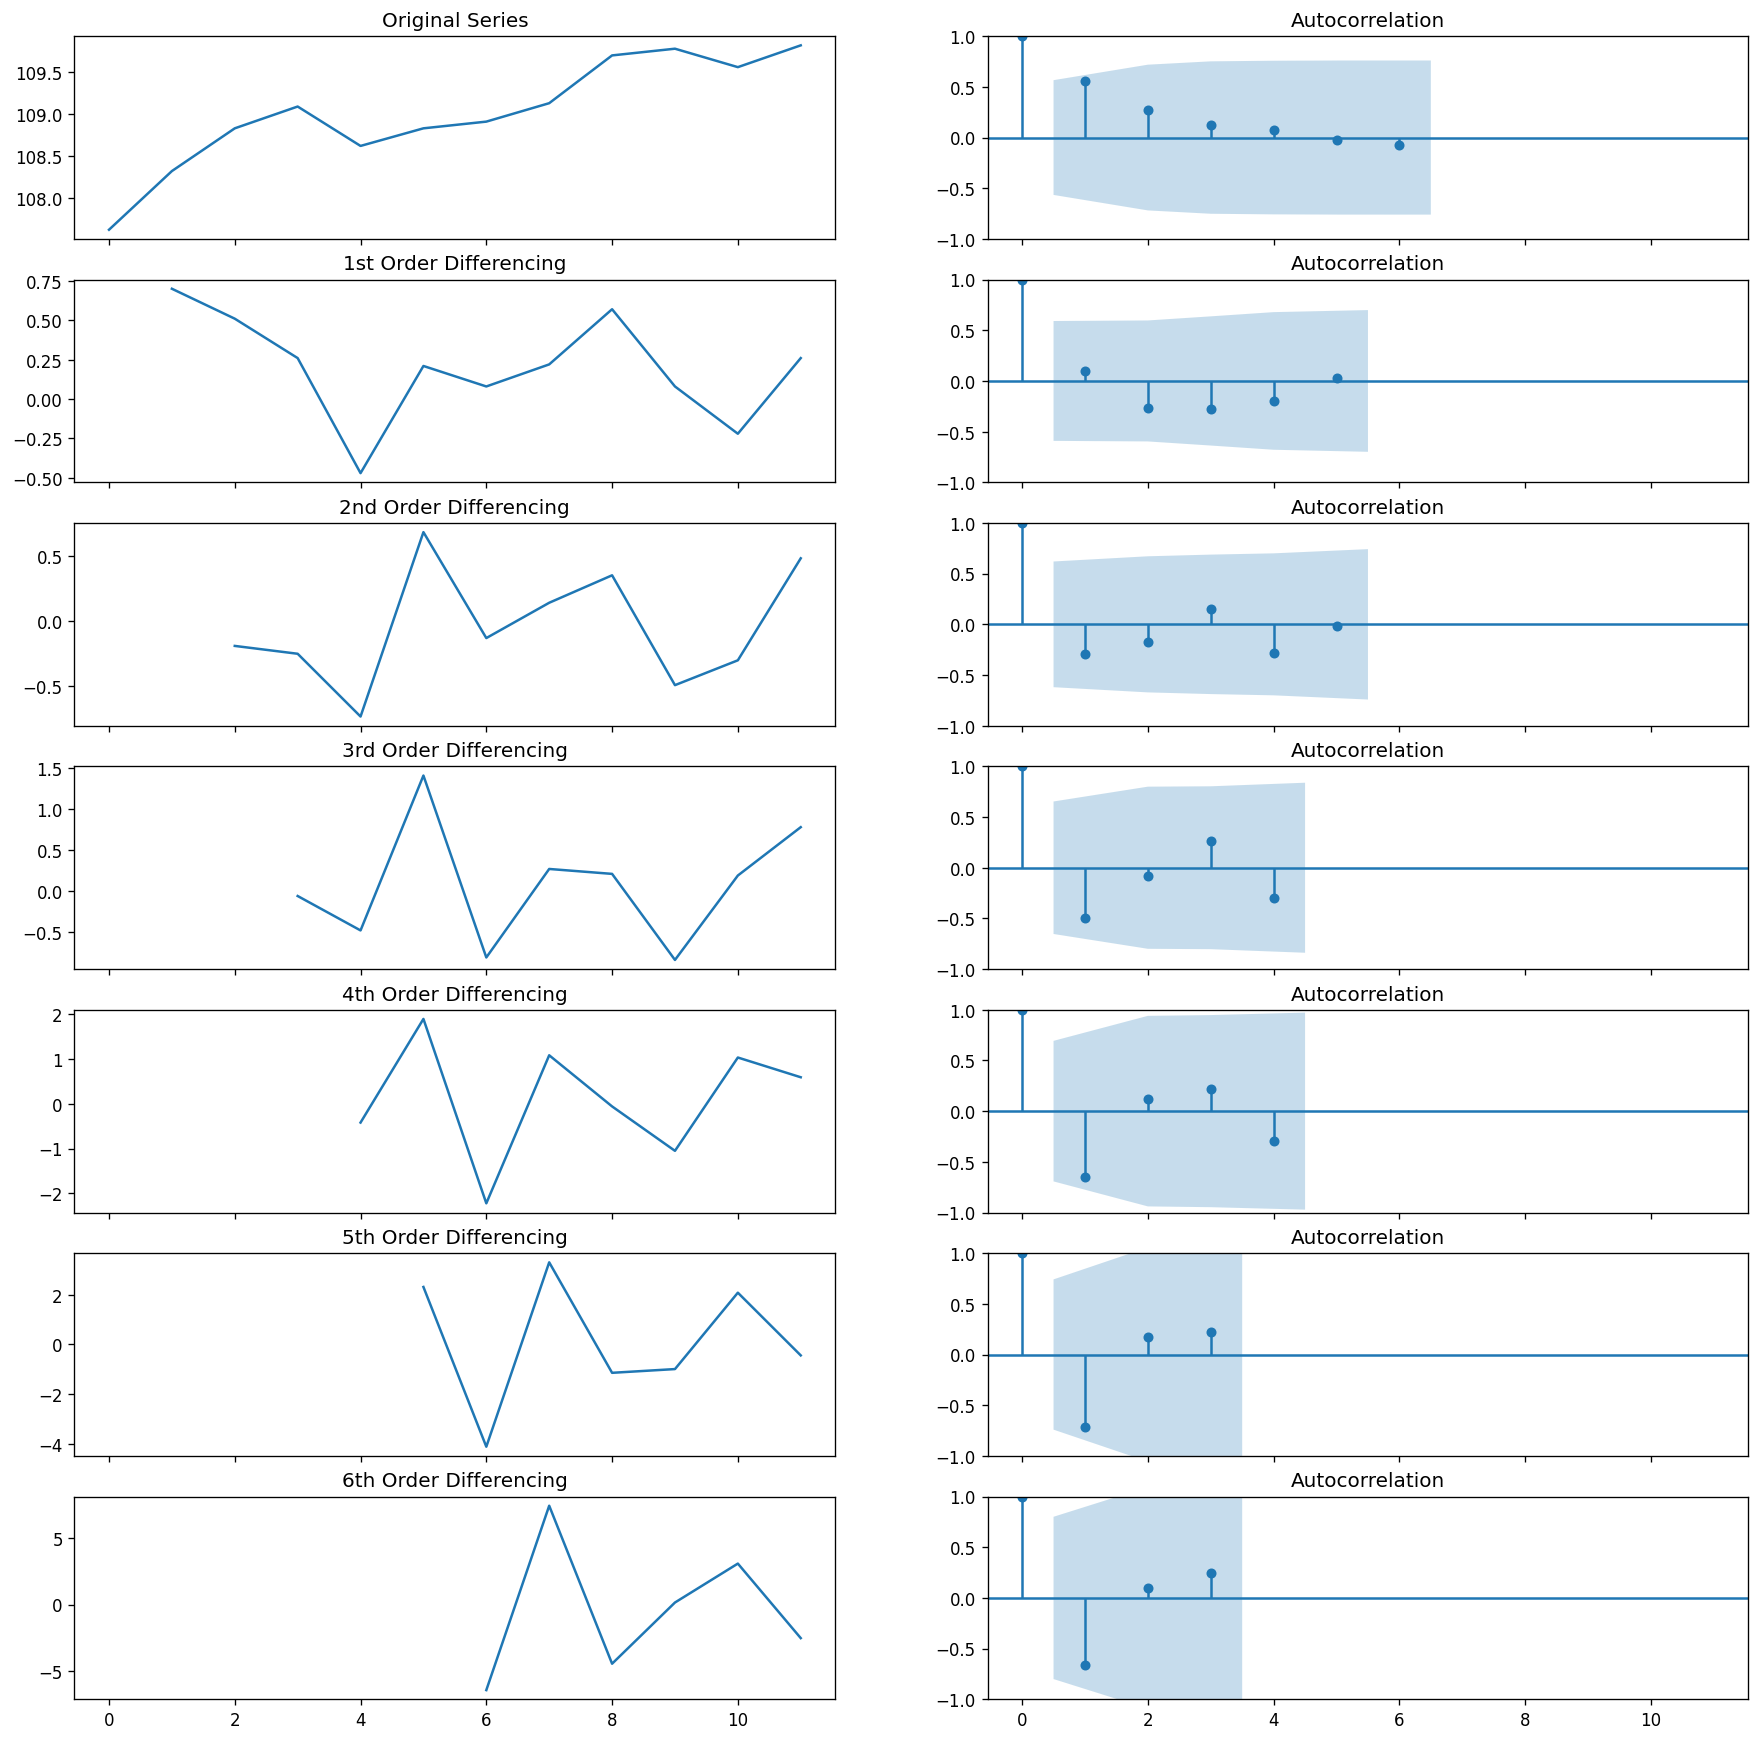

In [12]:
#The above value of p is >>> than 0.05 hence we need to do differencing
#time to see how the autocorreleation plot looks like
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(18,18), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(7, 2, sharex=True)
axes[0, 0].plot(df.AVERAGE); axes[0, 0].set_title('Original Series')
plot_acf(df.AVERAGE, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.AVERAGE.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.AVERAGE.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.AVERAGE.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.AVERAGE.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df.AVERAGE.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.AVERAGE.diff().diff().diff().dropna(), ax=axes[3, 1])

# 4thnd Differencing
axes[4, 0].plot(df.AVERAGE.diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(df.AVERAGE.diff().diff().diff().diff().dropna(), ax=axes[4, 1])

# 5th Differencing
axes[5, 0].plot(df.AVERAGE.diff().diff().diff().diff().diff()); axes[5, 0].set_title('5th Order Differencing')
plot_acf(df.AVERAGE.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])

# 6th Differencing
axes[6, 0].plot(df.AVERAGE.diff().diff().diff().diff().diff().diff()); axes[6, 0].set_title('6th Order Differencing')
plot_acf(df.AVERAGE.diff().diff().diff().diff().diff().diff().dropna(), ax=axes[6, 1])





plt.show()

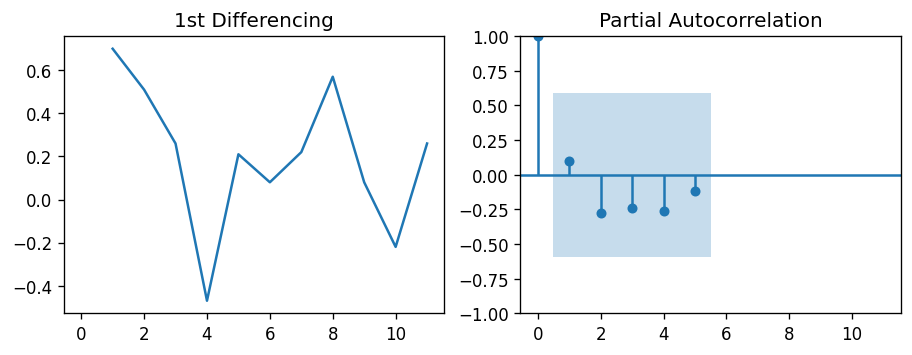

In [13]:
#AR TERM P
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.AVERAGE.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.AVERAGE.diff().dropna(), ax=axes[1])

plt.show()


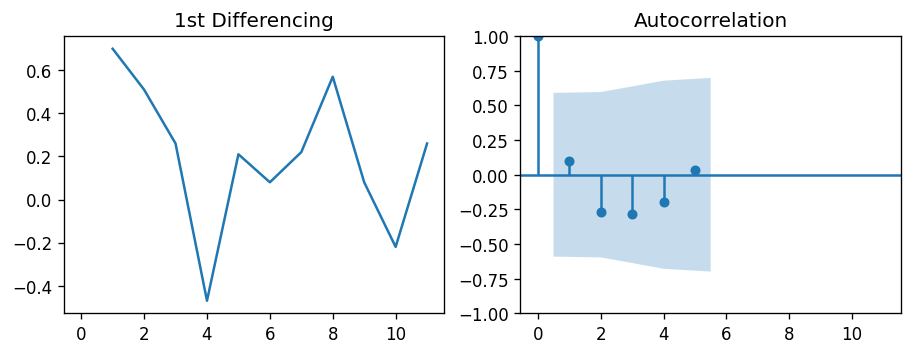

In [14]:
#p is as its the most significat lag
#checking for q(ma)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.AVERAGE.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.AVERAGE.diff().dropna(), ax=axes[1])

plt.show()

In [15]:
#q is 2 (none are above the significat  line)
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model = ARIMA(df.AVERAGE, order=(2,2,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                AVERAGE   No. Observations:                   12
Model:                 ARIMA(2, 2, 3)   Log Likelihood                  -4.079
Date:                Mon, 22 Apr 2024   AIC                             20.158
Time:                        08:41:13   BIC                             21.974
Sample:                             0   HQIC                            18.167
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4914      5.444     -0.274      0.784     -12.162       9.179
ar.L2         -0.4976      3.816     -0.130      0.896      -7.977       6.982
ma.L1          0.9735   1443.865      0.001      0.9

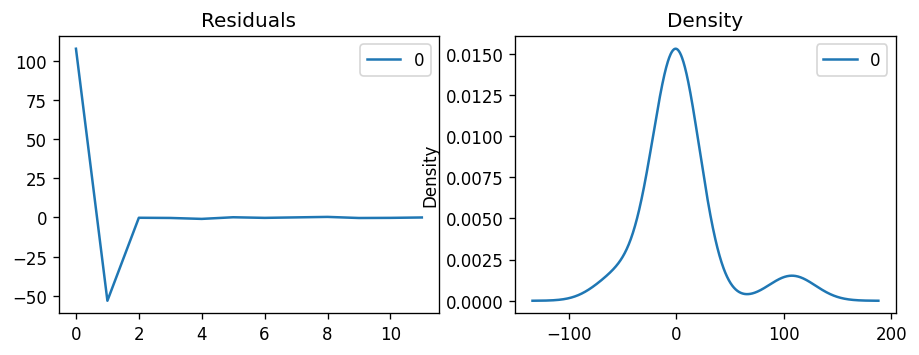

In [16]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [17]:
# Forecast future values
forecast_steps = 12  # Specify the number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Print forecasted values
print('Forecasted Values:')
print(forecast)

Forecasted Values:
12    109.954395
13    110.229218
14    110.363245
15    110.637376
16    110.772619
17    111.045281
18    111.182109
19    111.453138
20    111.591613
21    111.860998
22    112.001106
23    112.268874
Name: predicted_mean, dtype: float64
